# Machine Learning Model - Heart Disease Prediction 

The notebook uses Python machine learning and data science libraries to build a model to predict if a patient has heart disease based on their underlying medical data. 

###### Outline of Project:
1. Problem Definition
2. Data
3. Evaluation
4. Data Features
5. Baseline Models
6. Model Analysis and Experimentation


## 1. Problem Definition

Based on the patient medical data provided, the objective of this project is to implement a binary classification machine learning model to predict if the patient has heart disease.


## 2. Data

The original source of the data used to produce this model can be found at the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Heart%20Disease


## 3. Evaluation

Evaluation Metric - Accuracy (95%) - can the model be implemented and improved to predict patient heart disease 95% of the time?


## 4. Data Features


### Data Dictionary: 14 attributes total 


| # | Attribute                 | Field Name | Type    | Notes                                            |
|:--| :--                       | :--------- | :-----: | :------------                                    |
|01.| Age                       | age        | int64   | age in years                                     |
|02.| Sex                       | sex        | int64   | gender (1=male; 0=female)                        |
|03.| Chest Pain Type           | cp         | int64   | chest pain type (see below)                      |
|04.| Resting Blood Pressure    | trestbps   | int64   | resting blood pressure mm Hg                     |
|05.| Serum Cholesterol         | chol       | int64   | LDL + HDL + .2 * triglycerides (mg/dl)           |
|06.| Fasting Blood Sugar       | fbs        | int64   | > 120 mg/dl (1=True; 0=False)                    |
|07.| Resting ECG Results       | restecg    | int64   | resting electrocardiographic results (see below) |
|08.| Max Heart Rate            | thalach    | int64   | maximum heart rate                               |
|09.| Exercise-Induced Angina   | exang      | int64   | exercise induced angina (1=yes; 0=no)            |
|10.| ST Depression             | oldpeak    | float64 | ST depression by exercise relative to rest       |
|11.| ST Peak Slope             | slope      | int64   | slope of peak exercise ST segment (see below)    |
|12.| Flourosopy-Colored Vessels| ca         | int64   | number of major vessels 0-3                      |
|13.| Thallium Results          | thal       | int64   | Result of thallium stress test                   |
|14.| Heart Disease Diagnosis   | target     | int64   | Heart Disease (1=True; 0=False)                  |

#### Legend

##### 03. Chest Pain Type
| Value | Description      | 
| :---: | :--              |
| 0     | asymptomatic     | 
| 1     | typical angina   | 
| 2     | atypical angina  | 
| 3     | non-anginal pain | 


##### 07. Resting ECG Results
| Value | Description              |
| :--:  | :--                      |  
| 0     | normal                   | 
| 1     | ST-T wave abnormality    | 
| 2     | ventricular hypertrophy  | 

##### 11. ST Peak Slope 
| Value | Description                        |
| :--:  | :--                                |  
| 0     | upward (uncommon)                  | 
| 1     | flat (typical of healthy heart)    | 
| 2     | downward (sign of unhealthy heart) |     

##### 13. Thallium Results
| Value | Description                        |
| :--:  | :--                                |  
| 1,3   | normal                             | 
| 6     | fixed defect                       | 
| 7     | reversible defect                  | 
    
**Note**: No personal identifiable information (PPI) can be found in the dataset.  

## Tools used in Model:

Data analysis and modeling using Python - pandas, NumPy, scikit-learn, and Matplotlib. 

In [1]:
# Data 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn model selection and evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Data Analysis

In [2]:
data = pd.read_csv('./data/heart-disease.csv')
data  # data.head() and data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


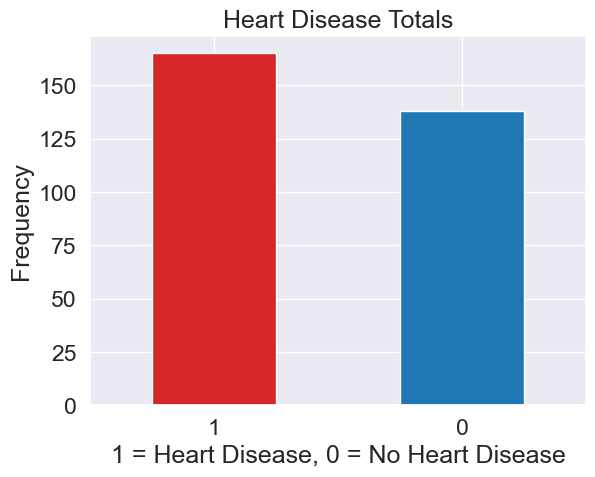

In [55]:
# Overview of target column - heart disease diagnosis
data['target'].value_counts().plot(kind='bar', color=['tab:red', 'tab:blue'])
plt.title('Heart Disease Totals')
plt.xlabel('1 = Heart Disease, 0 = No Heart Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=0);

In [4]:
# High level overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Check for missing data
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Data Statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease by Gender

In [7]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


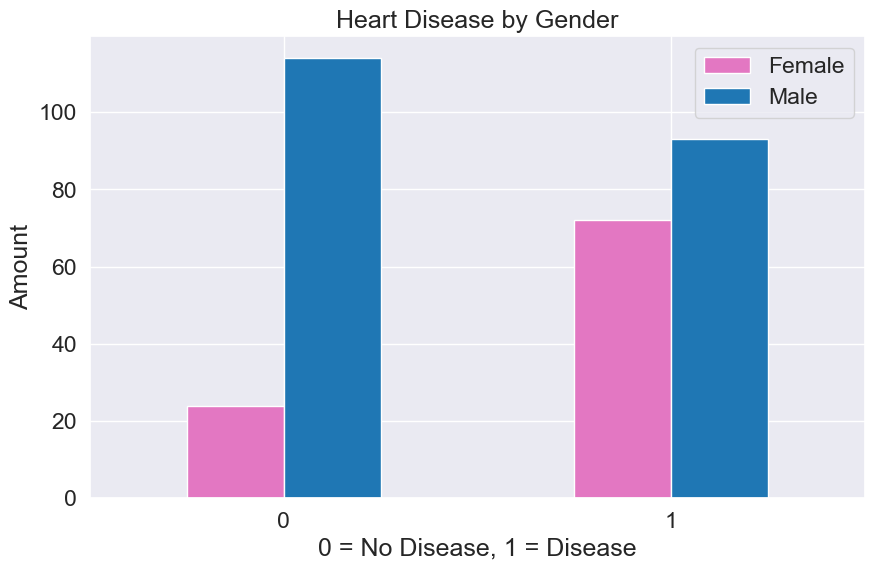

In [56]:
pd.crosstab(data.target, data.sex).plot(kind='bar', 
                                        figsize=(10,6),
                                        color=['tab:pink', 'tab:blue'])
plt.title('Heart Disease by Gender')
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Heart Disease by Age and Max Heart Rate

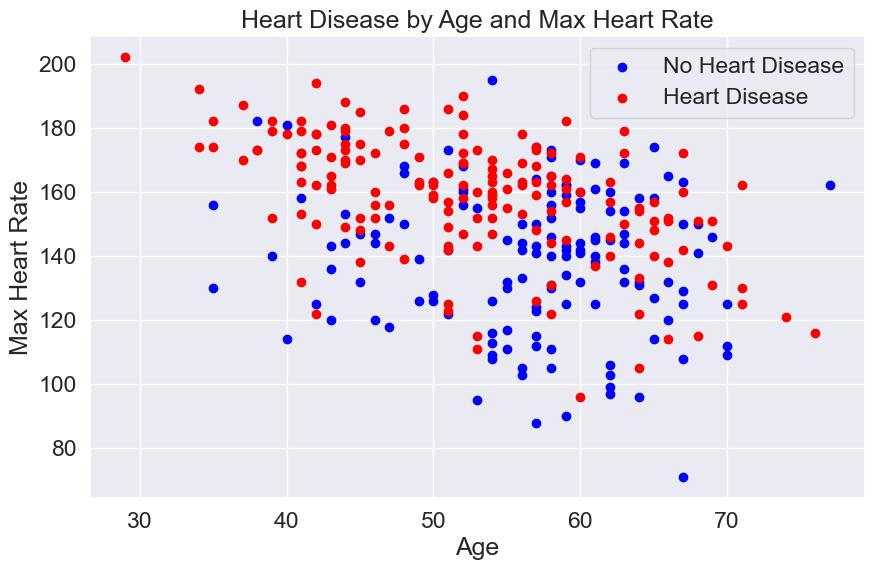

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c='blue');

plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c='red')

plt.title('Heart Disease by Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['No Heart Disease', 'Heart Disease']);


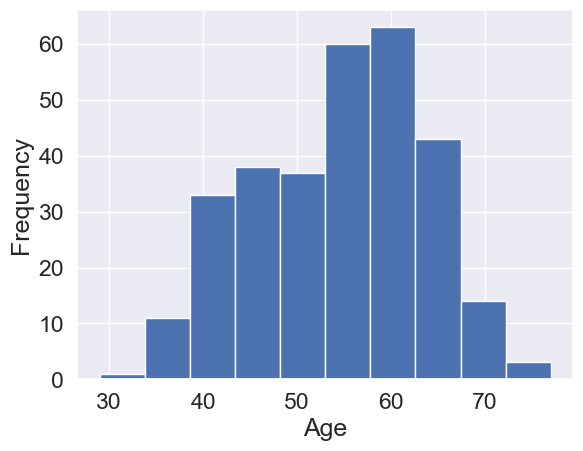

In [59]:
# Plot age distribution 
data.age.plot.hist()
plt.xlabel('Age');

### Heart Disease by Chest Pain Type

In [12]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


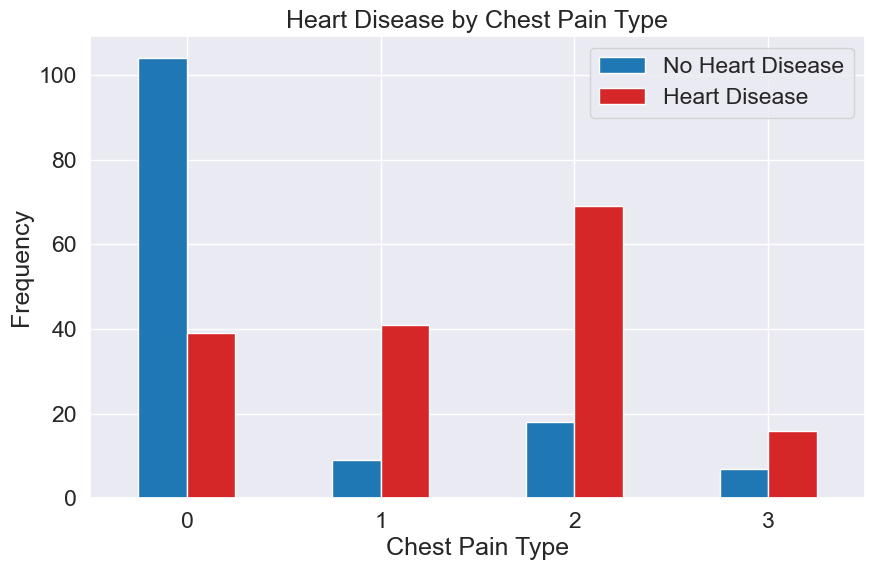

In [60]:
pd.crosstab(data.cp, data.target).plot(kind='bar',
                                      figsize=(10,6),
                                      color = ['tab:blue','tab:red'])
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0);

### Correlation Matrix

In [14]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


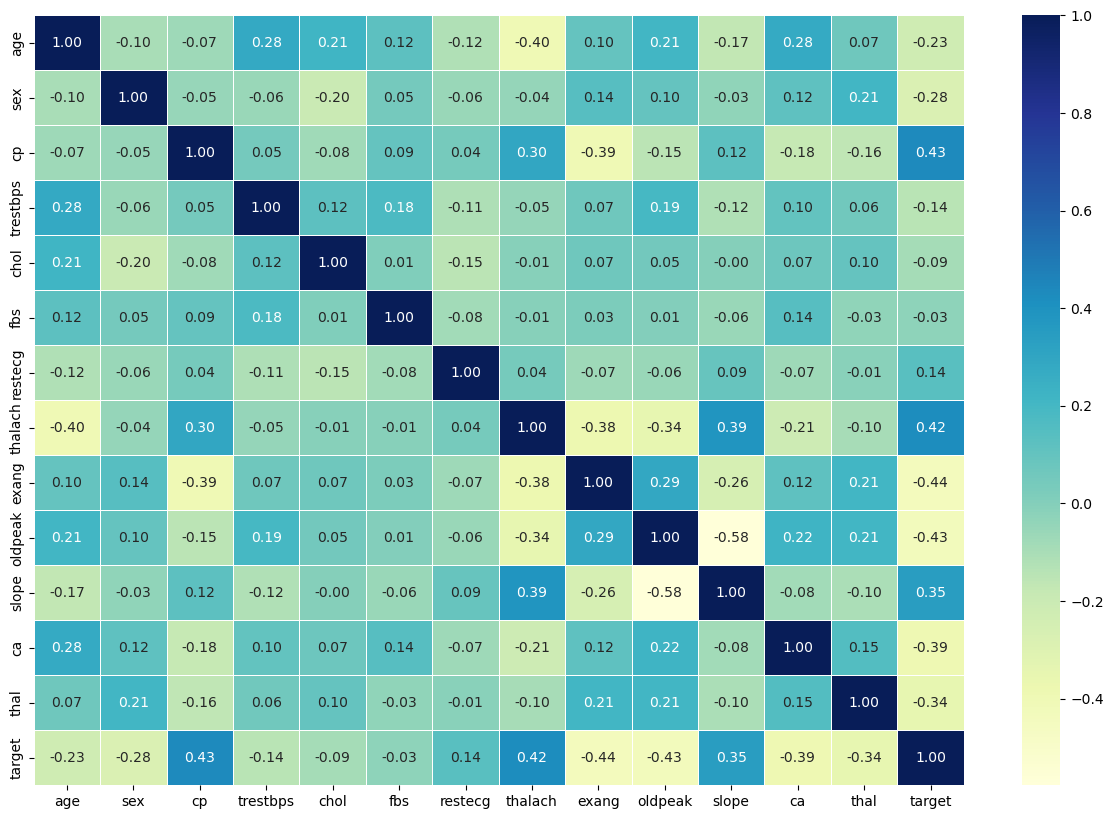

In [15]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

## 5. Baseline Models

In [16]:
# Split data into independent and target variables, training and testing data
x = data.drop('target', axis=1)
y = data['target']
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Try three machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [17]:
# Classification Models
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Testing Framework (fit and score)
def test_models(models, x_train, x_test, y_train, y_test):
    """
    Evaluate machine learning model on data
    model: machine learning models
    x_train: training data (no target variable)
    x_test: testing data (no target variable)
    y_train: target variable for training data
    y_test: target variable for testing data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [61]:
model_scores = test_models(models, x_train, x_test, y_train, y_test)

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

In [67]:
pd.DataFrame(model_scores, index=['Accuracy'])

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


### Baseline Model Comparison

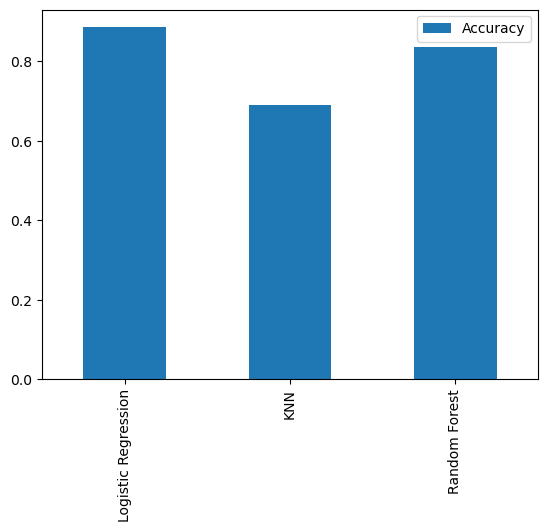

In [19]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

## 6. Model Analysis and Experimentation
* Hyperparameter Tuning
* ROC curve
* Area under curve (AUC)
* Confusion Matrix
* Classification Report
* Cross-validation
* Precision
* Recall
* F1 score
* Feature Importance

#### Hyperparameter Tuning

In [68]:
# K-nearest neighbors (KNN)
test_scores = []

# n_neighbors
neighbors = range(1, 21)

# Model
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    test_scores.append(knn.score(x_test, y_test))
    

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Max KNN score: 75.41%


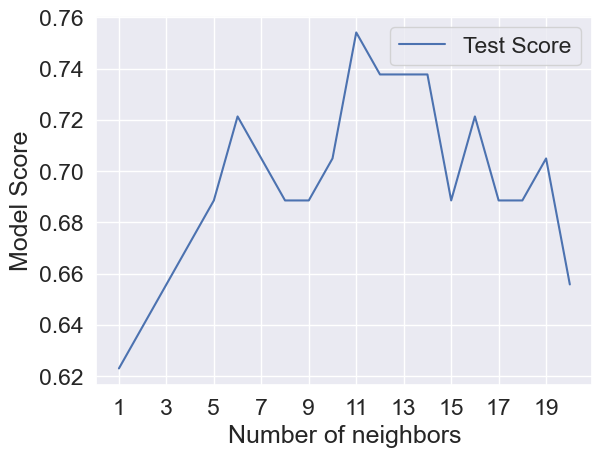

In [69]:
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1, 21, 2))
plt.legend()

print(f'Max KNN score: {max(test_scores)*100:.2f}%')

#### Hyperparameter Tuning using RandomizedSearchCV

In [22]:
# Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# Random Forest
rf_grid = {'n_estimators': np.arange(100, 350, 10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [23]:
# Tune LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [25]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [26]:
# Tune Random Forest Classifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50,
                           verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340])},
                   verbose=True)

In [27]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_depth': None}

In [28]:
rs_rf.score(x_test, y_test)

0.8688524590163934

#### Hyperparameter Tuning using GridSearchCV

In [29]:
# Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv = 5,
                         verbose=True)
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [30]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [31]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [32]:
# Random Forest
rf_grid_gs = {'n_estimators': np.arange(100, 251, 25),
          'max_depth': [None, 3, 5],
          'min_samples_split': [2, 4],
          'min_samples_leaf': [1, 5, 10, 15, 20]}

In [33]:
# Tune Random Forest Classifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid_gs,
                         cv = 5,
                         verbose=True)
gs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [34]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'n_estimators': 200}

In [35]:
gs_rf.score(x_test, y_test)

0.8688524590163934

#### Model Evaluation Metrics

In [36]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

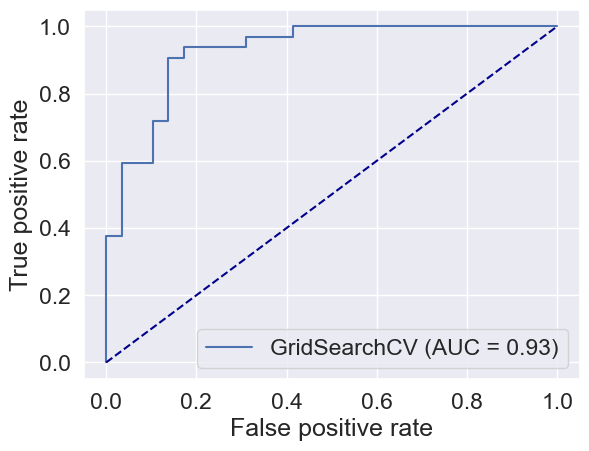

In [77]:
# Plot Receiver Operating Characteristic (ROC) curve and AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='')
plt.xlabel("False positive rate")
plt.ylabel('True positive rate');


##### Confusion Matrix

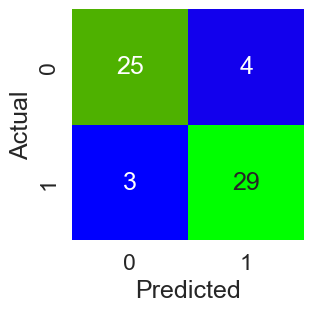

In [71]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plot confusion matrix using heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                    cmap='brg')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plot_conf_mat(y_test, y_preds)

##### Classification Report

In [40]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Metrics:**
* Precision - The proportion of correct positive predictions. A model with no false positives has a precision of 1.0.
* Recall - The proportion of actual positives identified. A model with no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model. Perfect accuracy is equal to 1.0.
* Macro avg - The average precision, recall and F1 score between classes. Consider this metric if there are class imbalances.
* Weighted avg - The weighted average precision, recall and F1 score between classes. 

#### Cross-validated evaluation metrics

5-fold cross-validation metrics using `cross_val_score()`
* Accuracy
* Precision
* Recall
* F1 Score 

In [41]:
# Logistic Regression Model
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear', max_iter=100)

In [42]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [43]:
# Cross-validated Precision
cv_prec = cross_val_score(clf, x, y, cv=5, scoring='precision')
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [44]:
# Cross-validated Recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [45]:
# Cross-validated F1 Score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

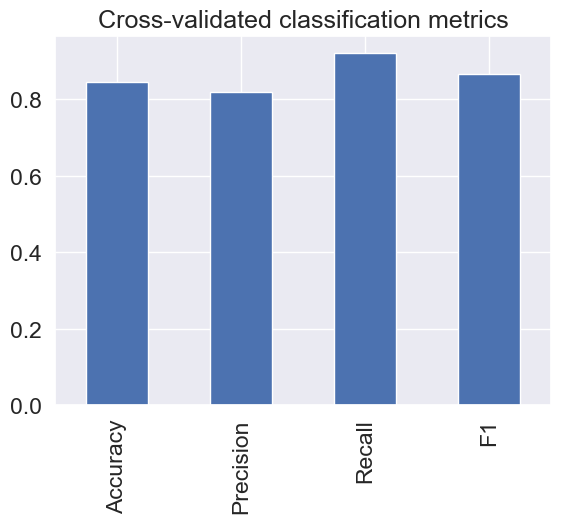

In [46]:
# Summarize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

#### Feature Importance

Main drivers of the model

In [47]:
# Logistic Regression fitted model
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear', max_iter=100)

clf.fit(x_train, y_train);

In [48]:
# Check Model coefficients
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [49]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


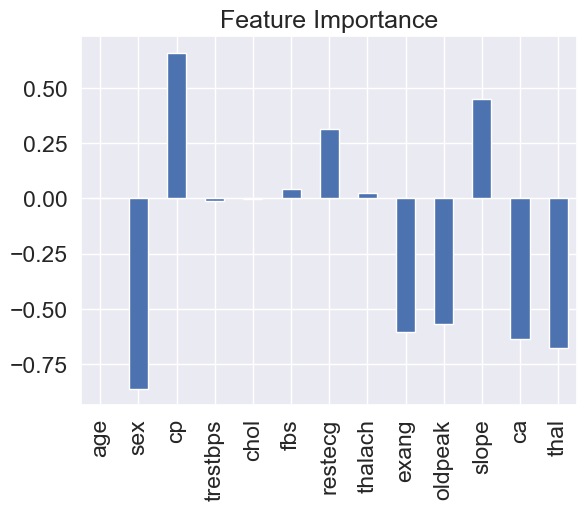

In [50]:
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [51]:
# Check results
pd.crosstab(data['sex'],data['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [52]:
pd.crosstab(data['slope'],data['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Summary

The original evaluation metric was set as 95% Accuracy. During the analysis, three different models were tested: 1) Logistic Regression, 2) K-Nearest Neighbors, and 3) Random Forest. Neither of the models achieved 95% accuracy, including the baseline models as well as after tuning. 

Possible improvements -
* Collect more data. The data set is fairly small, and while the target column is reasonably balanced, some features are not balanced. For instance, consider the data for gender above. The proportion of females in the data with heart disease outweighs those without, whereas males without heart disease outweigh those with heart disease in the data. There are also more males in the data than females. Consideration should be given to whether or not these splits make sense, and whether or not a separate model is needed to predict heart disease for each gender.
* Experiment with additional classification models.
* Continue to improve the current models, such as with further tuning of hyperparameters.

###### Format Markdown Tables

In [53]:
%%html
<style>
    table {
        display: inline-block
    }
</style>